# Image manipulation and processing using Numpy and Scipy

- numpy: basic array manipulation
- scipy: scipy.ndimage submodule dedicated to image processing (n-dimensional images)

# 1.1 Opening and writting to image files

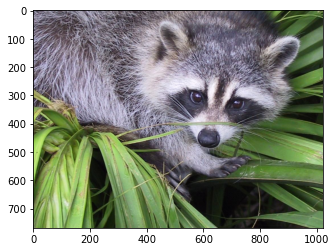

In [1]:
# writting an array to a file
from scipy import misc
import imageio
import matplotlib.pyplot as plt

f = misc.face()
imageio.imsave('face.png', f)
plt.imshow(f)
plt.show()

In [2]:
# creating a numpy array froam an image file
face = imageio.imread('face.png')
type(face)
face.shape, face.dtype
# dtype is unit8 for 8-bit images (0-255)

((768, 1024, 3), dtype('uint8'))

In [3]:
# opening raw files (camera, 3D images)
import numpy as np
face.tofile('face.raw') # create raw file
face_from_raw = np.fromfile('face.raw',dtype=np.uint8)
print(face_from_raw.shape)
face_from_raw.shape = (768,1024,3)
print(face_from_raw.shape)

(2359296,)
(768, 1024, 3)


# 1.2 Displaying images

(-0.5, 1023.5, 767.5, -0.5)

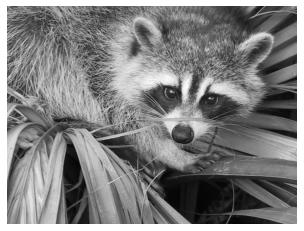

In [4]:
# use matplotlib and imshow to display an image inside matplotlib figure
# retrieve a grayscale image
f = misc.face(gray=True) 
plt.imshow(f,cmap=plt.cm.gray)
plt.axis('off')

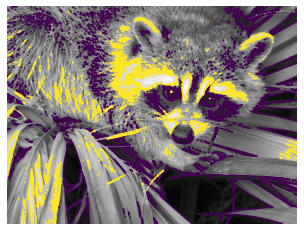

In [5]:
# draw contour lines
plt.imshow(f,cmap=plt.cm.gray)
plt.axis('off')
plt.contour(f,[50,200])

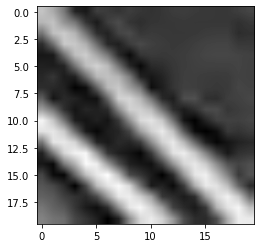

In [6]:
plt.imshow(f[320:340,510:530],cmap=plt.cm.gray,interpolation='bilinear')

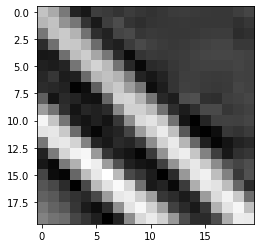

In [7]:
plt.imshow(f[320:340,510:530],cmap=plt.cm.gray,interpolation='nearest')

# 1.3 Basic manipulations

In [8]:
# images are array. use the whole numpy machinery
face = misc.face(gray=True)
face[0,40]

127

In [9]:
# slicing
face[10:13,20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

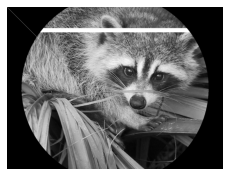

In [10]:
face[100:120]=255
lx, ly = face.shape
X, Y = np.ogrid[0:lx,0:ly]
mask = (X - lx / 2)**2 + (Y - ly / 2)**2 > lx * ly / 4
# masks
face[mask] = 0
# fancy indexing
face[range(400),range(400)] = 255
plt.figure(figsize=(3,3))
plt.axes([0,0,1,1])
plt.imshow(face,cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [11]:
# statistical information
face = misc.face(gray=True)
face.mean()

113.48026784261067

In [12]:
face.max(), face.min()

(250, 0)

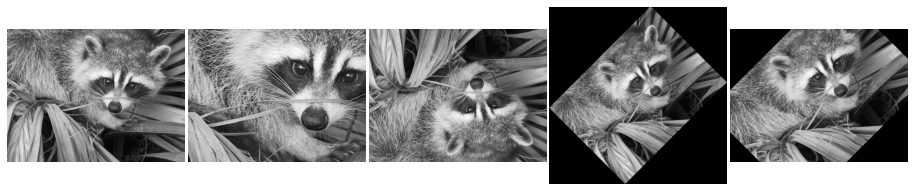

In [13]:
import numpy as np 
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt 
face = scipy.misc.face(gray=True)
lx, ly = face.shape
# cropping
crop_face = face[lx//4:-lx//4,ly//4:-ly//4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face,45)
rotate_face_noreshape = ndimage.rotate(face,45,reshape=False)
plt.figure(figsize=(12.5,12.5))
plt.subplot(151)
plt.imshow(face,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape,cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0.02,hspace=0.3,top=1,bottom=0.1,left=0,right=1)
plt.show()

# 1.4 Image filtering
Local filters: replace the value of pixels by a function of the values of neighboring pixels.

1.4.1 Blurring/smoothing

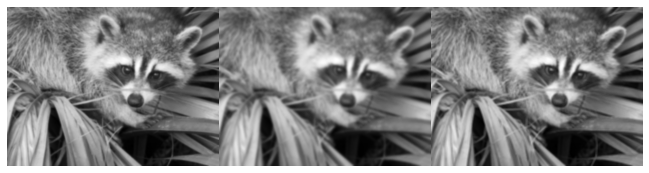

In [15]:
# Gaussian Filter from scipy.ndimage
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face,sigma=3)
very_blurred = ndimage.gaussian_filter(face,sigma=5)

# Uniform filter
local_mean = ndimage.uniform_filter(face,size=11)

# visualization
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(blurred_face,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean,cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(wspace=0,hspace=0.,top=0.99,bottom=0.01,left=0.01,right=0.99)
plt.show()

1.4.2 Sharpening

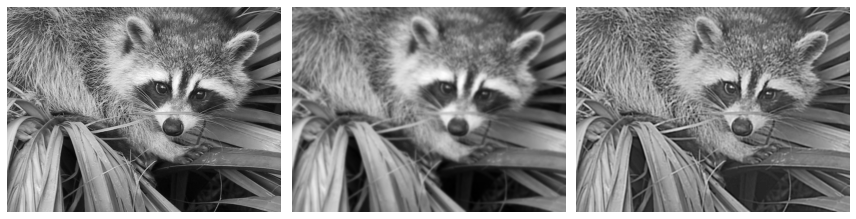

In [16]:
# sharpen a blurred image
from scipy import misc
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face,3)

# increase the weight of edges by adding an approximation of the Laplacian
filter_blurred_f = ndimage.gaussian_filter(blurred_f,1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

# visualization
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')
plt.tight_layout()
plt.show()

1.4.3 Denoising

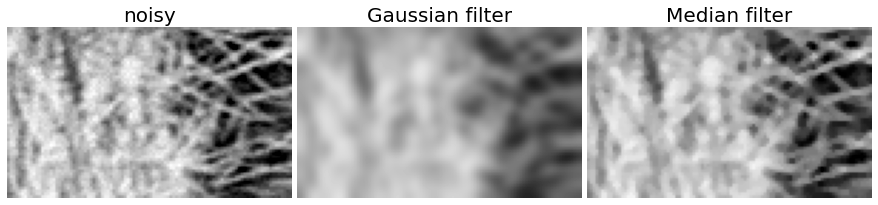

In [21]:
import numpy as np 
import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt 
f = scipy.misc.face(gray=True)
f = f[230:290,220:320]
noisy = f + 0.4*f.std()*np.random.random(f.shape)
# gaussian filter smoothes the noise out and the edges as well
gauss_denoised = ndimage.gaussian_filter(noisy,2)
# median filter preserves better the edges
med_denoised = ndimage.median_filter(noisy,3)
plt.figure(figsize=(12,2.8))
plt.subplot(131)
plt.imshow(noisy,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.title('noisy',fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.title('Median filter',fontsize=20)
plt.subplots_adjust(wspace=0.02,hspace=0.02,top=0.9,bottom=0,left=0,right=1)
plt.show()

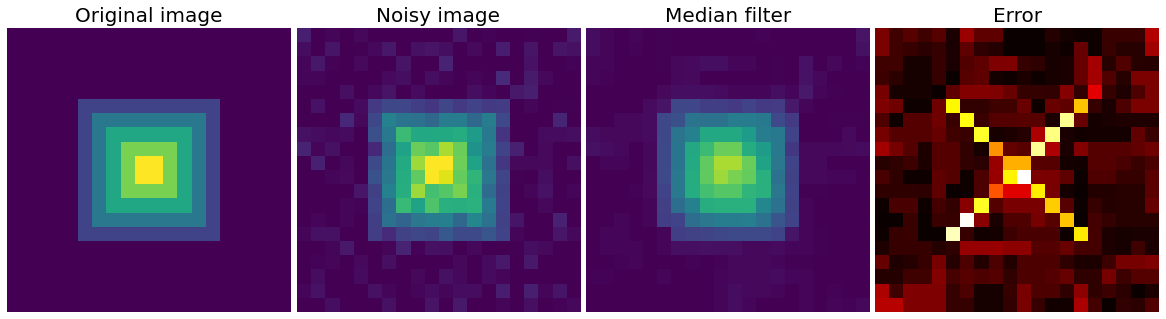

In [22]:
# median filter: better results for straight boundaries
im = np.zeros((20,20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2*np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise,3)
plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)
plt.show()

1.4.4 Mathematical morphology

Theory and technique for the analysis and processing of geometrical structures.

Probe an image with a simple shape (a structuring element), and modify this image according to how the shape locally fits or misses the image.

In [25]:
# structuring element
el = ndimage.generate_binary_structure(2,1)
print(el)
print(' ')
print(el.astype(np.int))

[[False  True False]
 [ True  True  True]
 [False  True False]]
 
[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [33]:
# erosion = minimum filter; replace the value of a pixel by the minimal value covered by the structuring element
a = np.zeros((7,7), dtype=np.int)
a[1:6,2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [34]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [36]:
# erosion removes objects smaller than the structure
ndimage.binary_erosion(a,structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

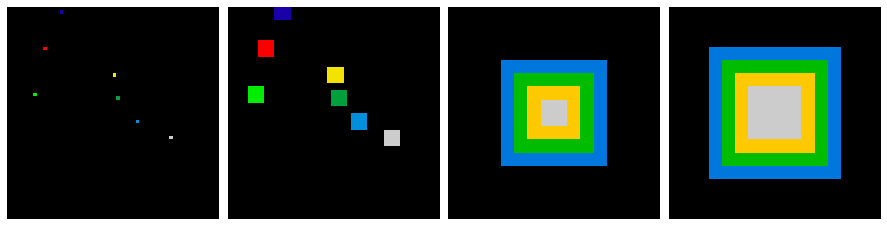

In [39]:
np.random.seed(2)
im = np.zeros((64, 64))
x, y = (63*np.random.random((2, 8))).astype(np.int)
im[x, y] = np.arange(8)
bigger_points = ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))
square = np.zeros((16, 16))
square[4:-4, 4:-4] = 1
dist = ndimage.distance_transform_bf(square)
dilate_dist = ndimage.grey_dilation(dist, size=(3, 3), \
        structure=np.ones((3, 3)))
plt.figure(figsize=(12.5, 3))
plt.subplot(141)
plt.imshow(im, interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.subplot(142)
plt.imshow(bigger_points, interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.subplot(143)
plt.imshow(dist, interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.subplot(144)
plt.imshow(dilate_dist, interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [42]:
# opening: erosing + dilation
# closing: dilation + erosion
a = np.zeros((5,5),dtype=np.int)
a[1:4,1:4] = 1; a[4,4]=1
print(a)
# opening removes small objects
ndimage.binary_opening(a,structure=np.ones((3,3))).astype(np.int)

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]


array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [43]:
# opening can also smooth corners
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

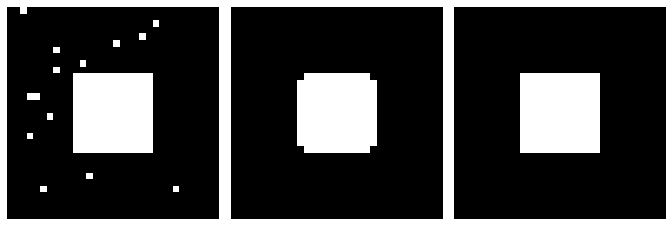

In [47]:
# application: remove noise
square = np.zeros((32,32))
square[10:-10,10:-10] = 1
np.random.seed(2)
x,y = (32*np.random.random((2,20))).astype(np.int)
square[x,y] = 1
open_square = ndimage.binary_opening(square)
eroded_square = ndimage.binary_erosion(square)
reconstruction = ndimage.binary_propagation(eroded_square,mask=square)
plt.figure(figsize=(9.5,3))
plt.subplot(131)
plt.imshow(square,cmap=plt.cm.gray,interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square,cmap=plt.cm.gray,interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction,cmap=plt.cm.gray,interpolation='nearest')
plt.axis('off')
plt.subplots_adjust(wspace=0,hspace=0.02,top=0.99,bottom=0.01,left=0.01,right=0.99)
plt.show()

# 1.5 Feature extraction

1.5.1 Edge detection

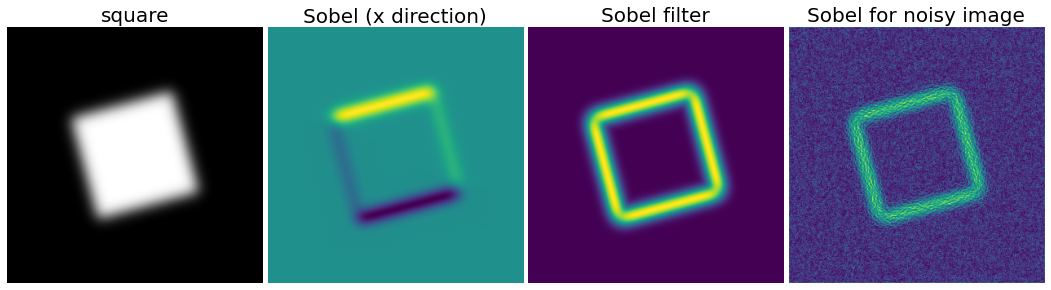

In [50]:
im = np.zeros((256,256))
im[64:-64,64:-64] = 1
im = ndimage.rotate(im,15,mode='constant')
im = ndimage.gaussian_filter(im,8)
# use a gradient operator (sobel) to find high intensity variations
sx = ndimage.sobel(im,axis=0,mode='constant')
sy = ndimage.sobel(im,axis=1,mode='constant')
sob = np.hypot(sx,sy)
plt.figure(figsize=(16,5))
plt.subplot(141)
plt.imshow(im,cmap=plt.cm.gray)
plt.axis('off')
plt.title('square',fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)',fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter',fontsize=20)

im += 0.07*np.random.random(im.shape)
sx = ndimage.sobel(im,axis=0,mode='constant')
sy = ndimage.sobel(im,axis=1,mode='constant')
sob = np.hypot(sx,sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image',fontsize=20)
plt.subplots_adjust(wspace=0.02,hspace=0.02,top=1,bottom=0,left=0,right=0.9)
plt.show()

1.5.2 Segmentation

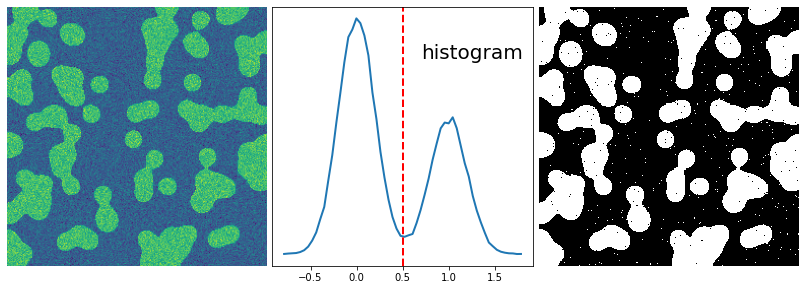

In [2]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
binary_img = img > 0.5
plt.figure(figsize=(11,4))
plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

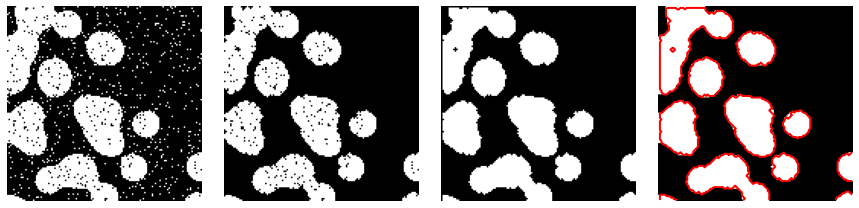

In [3]:
np.random.seed(1)
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = (im > im.mean()).astype(np.float)
img = mask + 0.3*np.random.randn(*mask.shape)
binary_img = img > 0.5
# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)
plt.figure(figsize=(12, 3))
l = 128
plt.subplot(141)
plt.imshow(binary_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(open_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)
plt.imshow(close_img[:l, :l], cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)
plt.imshow(mask[:l, :l], cmap=plt.cm.gray)
plt.contour(close_img[:l, :l], [0.5], linewidths=2, colors='r')
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

# 1.6 Measuring objects properties

    - ndimage.measurements

How many labels? 28
 


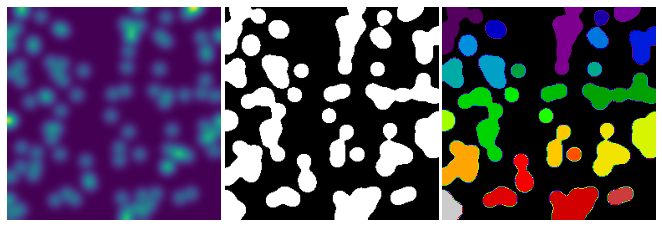

In [5]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()
label_im, nb_labels = ndimage.label(mask)
print('How many labels?', nb_labels)
print(' ')
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(label_im, cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()